In [138]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,RidgeCV,LassoCV,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [93]:
#Loading Dataset

df = pd.read_csv(r'E:\Data Trained studymaterial\Dataset\dataset1-master\dataset1-master\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Understanding Features

FIXED ACID - This is a total of most acids involved with wine or fixed or nonvolatile. It resembles a bell shaped, normal distribution graph.the maximum count goes somewhat around 7.5.

VOLATILE ACID - This attribute gives the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. The graph resembles the bell shaped , like a normal dirstibution. Majority of wines have values between [0.3, 0.72].

CITRIC ACID - Found in small quantities, citric acid can add ‘freshness’ and flavor to wines. There are two peaks appearing in the graph, one near 0.02 and other near 0.25.

RESIDUAL SUGAR - It is the amount of sugar remaining after fermentation stops. The graph for residual sugar is positively i.e left skewed. Majority of wines have lower than 2.5 residual sugar value.

CHLORIDES - Chlorides gives the amount of salt in the wine. Most of the wines have lesser than 0.2 chloride value.

FREE SO2 - Free sulfur dioxide prevents microbial growth and the oxidation of wine. Most of the wines have lesser than 20 free SO2 value.

TOTAL SO2 -Represents the amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 mg/L, SO2 becomes evident in the nose and taste of wine. The graph appears to be left skewed and most of the wines have lesser than 50 total SO2 value.

DENSITY - Density plot looks normally distributed, with mean eqals to 0.9967 and median equals to 0.9968.

pH - This attribute describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic), where 7 is neutral.The graph appears to be quiet normally distributed. Most of the wines have a pH level ranging between [3.2, 3.4].

SULPHATE - This is a wine additive which can contribute to sulfur dioxide gas (S02) levels and acts as an antimicrobial and antioxidant. It also resembles a bell shaped graph with maximum wines having around 6.5 sulphates value.

ALCOHOL CONTENT - The graph of alcohol content appears to be positively i.e left skewed and most of them are below 11% mark.

In [85]:
#Checking NULL Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [86]:
df.isna().sum()
#No null or missing values are present we can move forward

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [87]:
#Checking stats

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [88]:
#checking unique values in label

df['quality'].unique()



array([5, 6, 7, 4, 8, 3], dtype=int64)

# QUALITY - The wines in this dataset belong to the range[3,8] and most of them belong to 5.



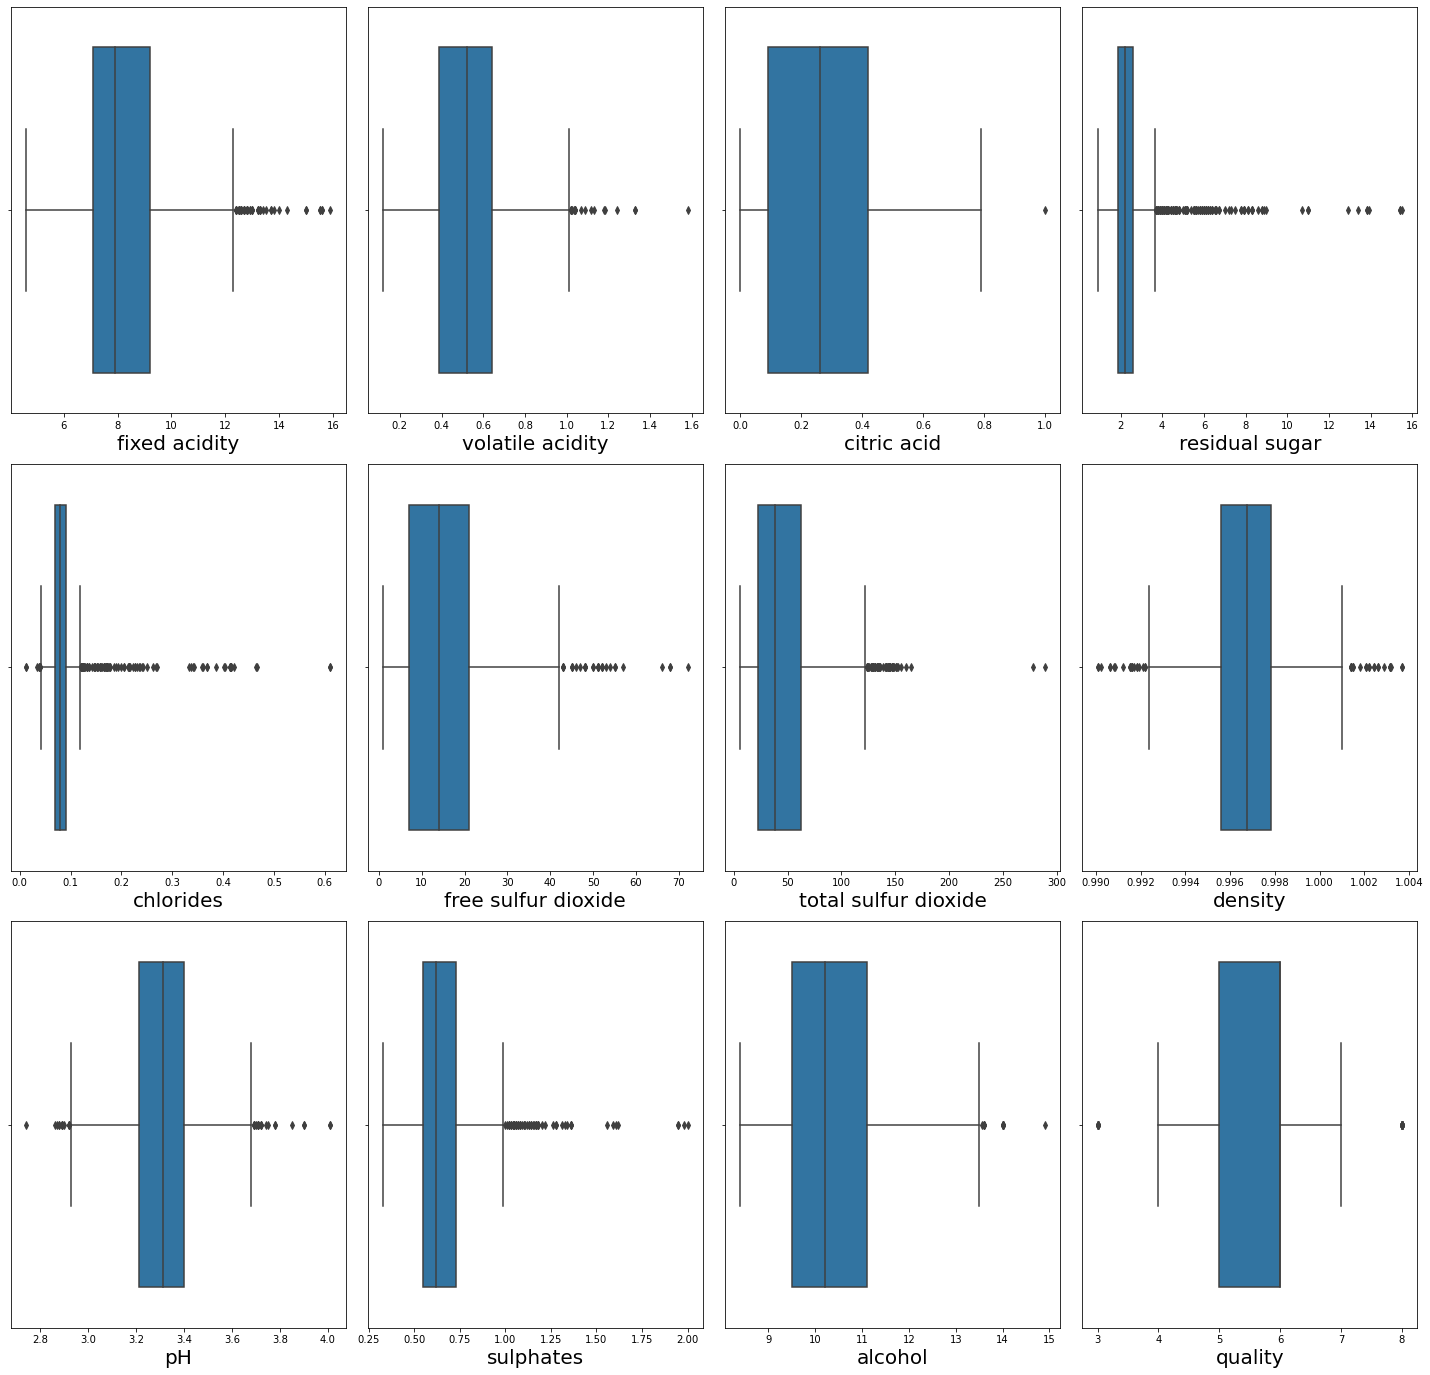

In [94]:
#Checking Outliers using boxplot


plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=16 : 
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()


In [97]:
#Removing Outliers using quantile method

q = df['fixed acidity'].quantile(0.95)
data_cleaned=df[df['fixed acidity']<q]
q=data_cleaned['volatile acidity'].quantile(0.97)
data_cleaned=data_cleaned[data_cleaned['volatile acidity']<q]
q=data_cleaned['citric acid'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['citric acid']<q]
q=data_cleaned['residual sugar'].quantile(0.95)
data_cleaned=data_cleaned[data_cleaned['residual sugar']<q]
q=data_cleaned['chlorides'].quantile(0.95)
data_cleaned=data_cleaned[data_cleaned['chlorides']<q]
q=data_cleaned['free sulfur dioxide'].quantile(0.97)
data_cleaned=data_cleaned[data_cleaned['free sulfur dioxide']<q]
q=data_cleaned['total sulfur dioxide'].quantile(0.97)
data_cleaned=data_cleaned[data_cleaned['total sulfur dioxide']<q]
q=data_cleaned['density'].quantile(0.98)
data_cleaned=data_cleaned[data_cleaned['density']<q]
q=data_cleaned['pH'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['pH']<q]
q=data_cleaned['sulphates'].quantile(0.98)
data_cleaned=data_cleaned[data_cleaned['sulphates']<q]
q=data_cleaned['alcohol'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['alcohol']<q]


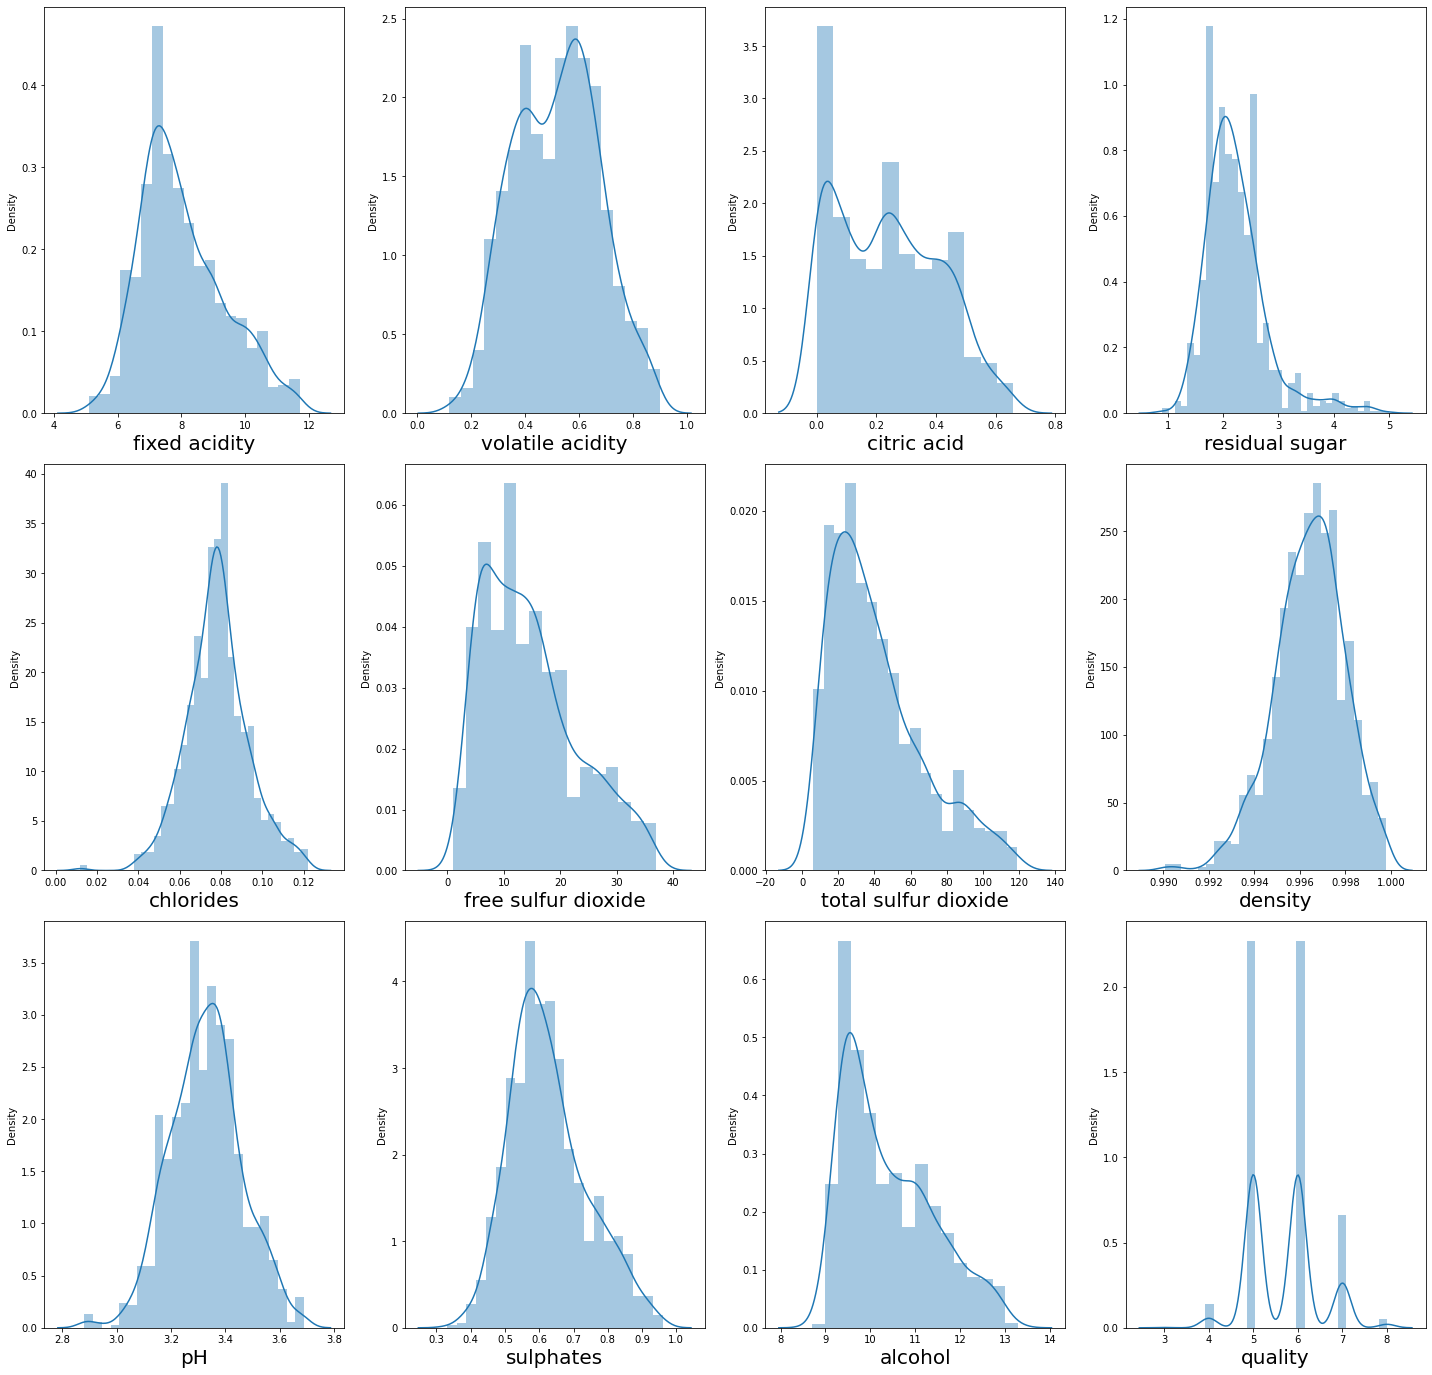

In [98]:
#Let's see after removing outliers how data is distributed
plt.figure(figsize=(20,25))

plotnumber=1

for column in data_cleaned:
    if plotnumber<=16 : 
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [99]:
data_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [101]:
#Let's see how feature is related to class

X = data_cleaned.drop(columns = ['quality'])
y = data_cleaned['quality']

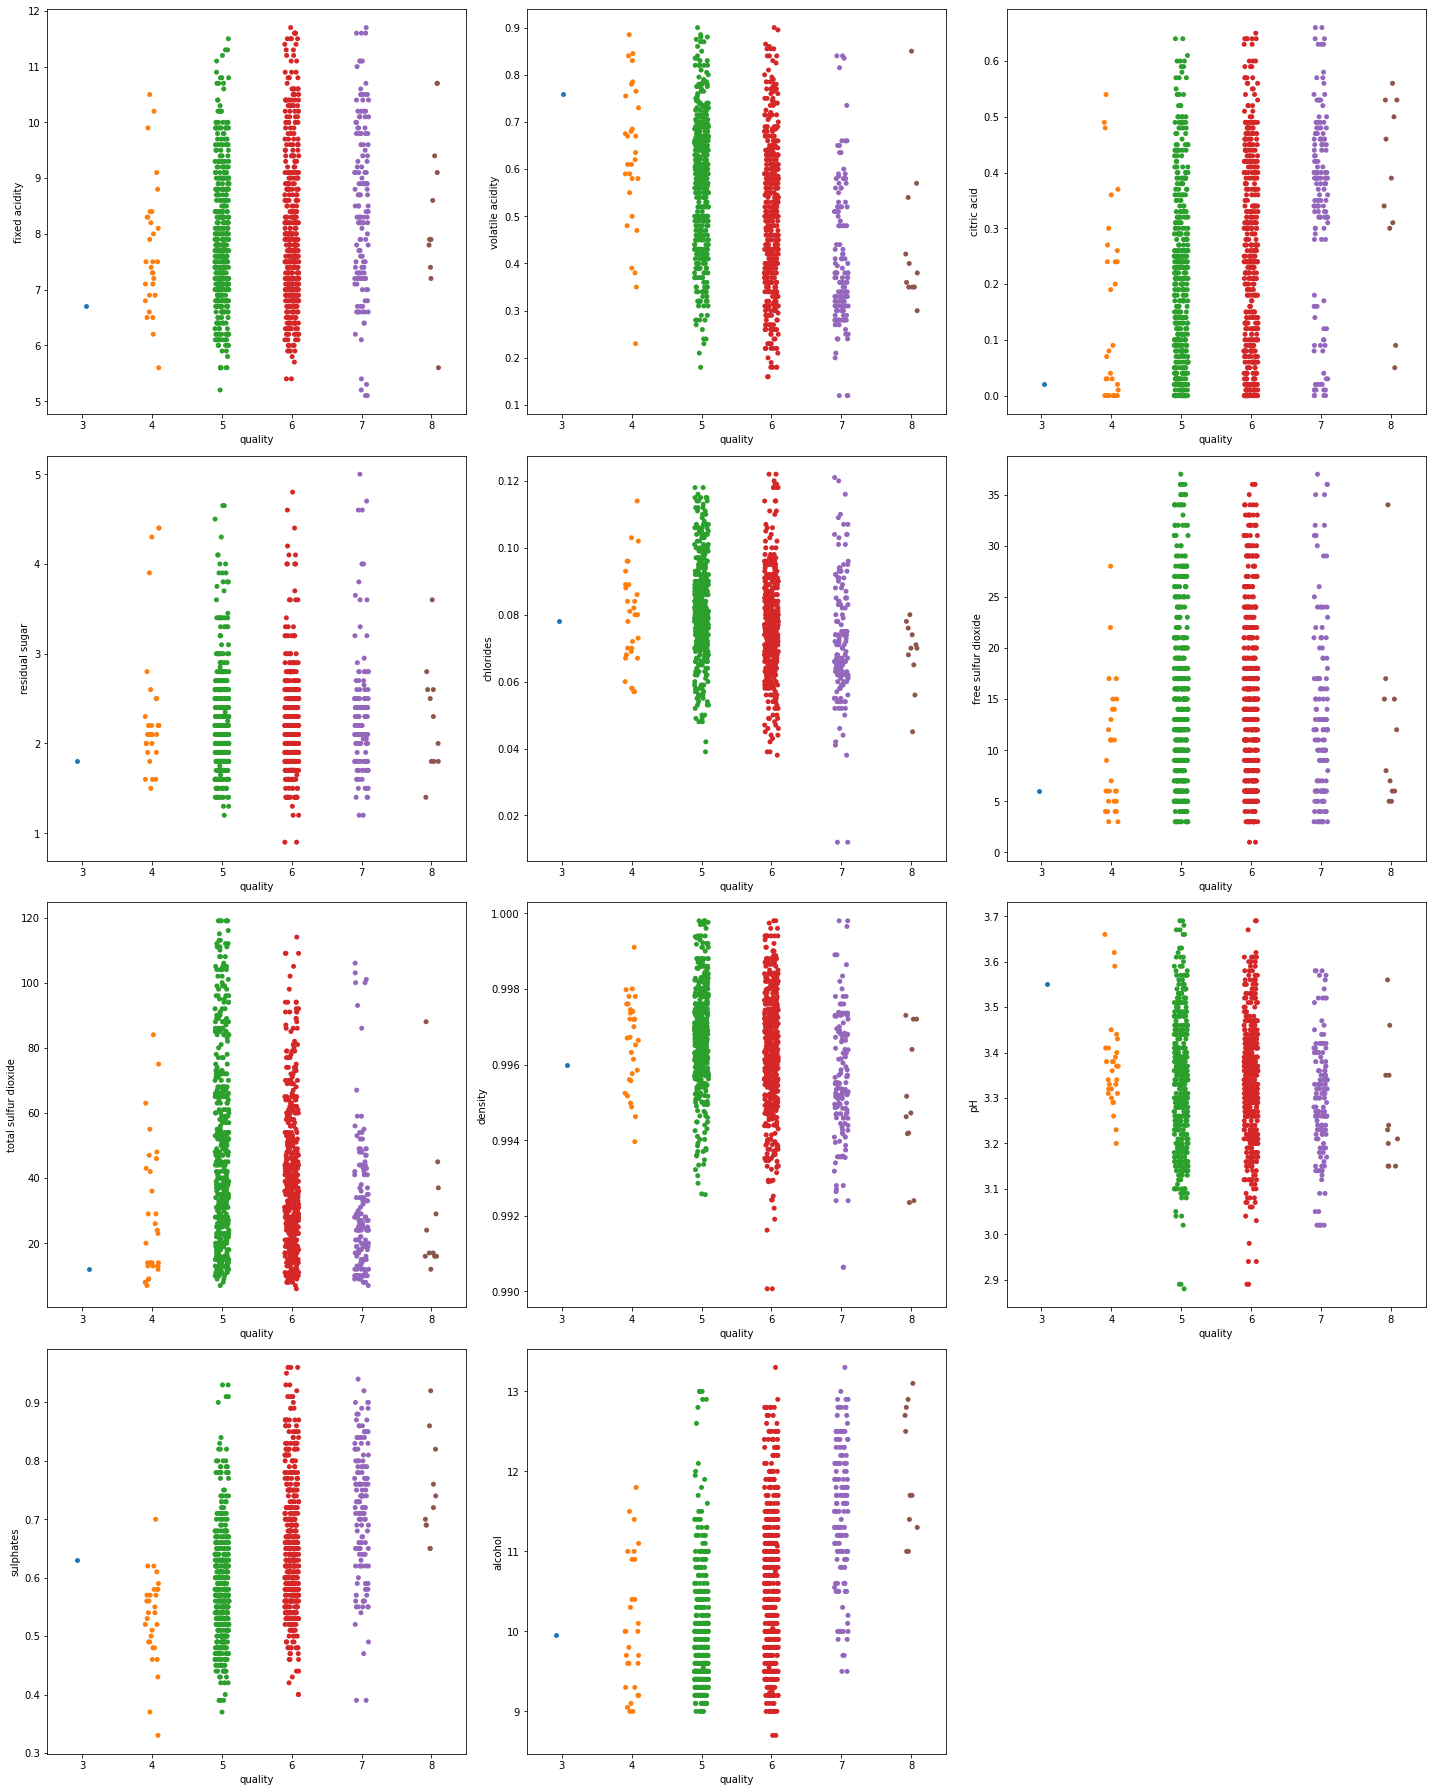

In [102]:
plt.figure(figsize=(20,25))

plotnumber=1

for column in X:
    if plotnumber<=12 : 
        ax=plt.subplot(4,3,plotnumber)
        sns.stripplot(y,X[column])
        
    plotnumber+=1
plt.tight_layout()

In [103]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[-0.47774228,  1.15164726, -1.37190486, ...,  1.37785202,
        -0.59662089, -0.99464374],
       [-0.17481594,  2.2973895 , -1.37190486, ..., -0.96731024,
         0.46582086, -0.59739757],
       [-0.17481594,  1.53356134, -1.14184288, ..., -0.51340787,
         0.20021042, -0.59739757],
       ...,
       [-1.31078972, -0.05774732, -0.62420343, ...,  0.69699846,
         1.08557854,  0.59434094],
       [-1.61371606,  0.80155936, -0.68171893, ...,  1.83175439,
         0.73143129, -0.2001514 ],
       [-1.53798447, -1.33079424,  1.33132337, ...,  0.47004727,
         0.28874723,  0.59434094]])

In [104]:
#Checking Multicollinearity

vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range (X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,6.006835,fixed acidity
1,2.106300,volatile acidity
2,3.020365,citric acid
3,1.499438,residual sugar
4,1.310605,chlorides
5,1.825013,free sulfur dioxide
6,2.028389,total sulfur dioxide
7,6.143139,density
8,3.131032,pH
9,1.314916,sulphates


# Since fixed acidity and density column having vif value
# greater than 5 than it means that there is high multicollinearity between them and we need to drop one of them

In [106]:
wine = data_cleaned.drop(columns = ['density'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5


In [146]:
#Categorising wine quality

categor_condn=[ (wine['quality']>=7),
               (wine['quality']<=7)]
rating=['good','notgood']
wine['rating'] = np.select(categor_condn,rating)

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,notgood
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5,notgood
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5,notgood
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6,notgood
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,notgood


In [147]:
wine['rating'].value_counts()

notgood    996
good       152
Name: rating, dtype: int64

In [148]:
#Using Encoding Techniques
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
wine['rating'] = labelencoder_y.fit_transform(wine['rating'])

In [149]:
X = wine.drop('rating', axis = 1).values
y = wine['rating'].values.reshape(-1,1)

# MODEL BUILDING

In [150]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=50)

In [151]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [153]:
# To store the accuracy result of all the models
results =[]

# 1.) Logistic Regression

In [154]:

model_LR = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
model_LR.fit(X_train_scale, y_train.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [155]:
cv_score_LR = cross_val_score(estimator = model_LR, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('LOGISTIC REGRESSION REPORT')
print("CV Score: ", cv_score_LR.mean())

y_train_predict_LR = model_LR.predict(X_train_scale)
train_accuracy_LR = accuracy_score(y_train, y_train_predict_LR)
print("Training set accuracy: ", train_accuracy_LR)

y_test_predict_LR = model_LR.predict(X_test_scale)
test_accuracy_LR = accuracy_score(y_test, y_test_predict_LR)
print("Test set accuracy: ", test_accuracy_LR)

results.append(test_accuracy_LR)

LOGISTIC REGRESSION REPORT
CV Score:  1.0
Training set accuracy:  1.0
Test set accuracy:  1.0


In [156]:
confusion_matrix(y_test, y_test_predict_LR)

array([[ 47,   0],
       [  0, 298]], dtype=int64)

# 2.) KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
model_KNN.fit(X_train_scale, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=32, weights='distance')

In [132]:
cv_score_KNN = cross_val_score(estimator = model_KNN, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('KNN REPORT')
print("CV Score: ", cv_score_KNN.mean())

y_train_predict_KNN = model_KNN.predict(X_train_scale)
train_accuracy_KNN = accuracy_score(y_train, y_train_predict_KNN)
print("Training set accuracy: ", train_accuracy_KNN)

y_test_predict_KNN = model_KNN.predict(X_test_scale)
test_accuracy_KNN = accuracy_score(y_test, y_test_predict_KNN)
print("Test set accuracy: ", test_accuracy_KNN)

results.append(test_accuracy_KNN)

KNN REPORT
CV Score:  0.9589043209876544
Training set accuracy:  1.0
Test set accuracy:  0.936231884057971


In [133]:
confusion_matrix(y_test, y_test_predict_KNN)

array([[ 26,  21],
       [  1, 297]], dtype=int64)

# 3.) Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
model_DT.fit(X_train_scale, y_train.ravel())

DecisionTreeClassifier(max_features=6, max_leaf_nodes=400, random_state=33)

In [135]:
cv_score_DT = cross_val_score(estimator = model_DT, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('DT REPORT')
print("CV Score: ", cv_score_DT.mean())

y_train_predict_DT = model_DT.predict(X_train_scale)
train_accuracy_DT = accuracy_score(y_train, y_train_predict_DT)
print("Training set accuracy: ", train_accuracy_DT)

y_test_predict_DT = model_DT.predict(X_test_scale)
test_accuracy_DT = accuracy_score(y_test, y_test_predict_DT)
print("Test set accuracy: ", test_accuracy_DT)

results.append(test_accuracy_DT)

DT REPORT
CV Score:  1.0
Training set accuracy:  1.0
Test set accuracy:  1.0


In [136]:
confusion_matrix(y_test, y_test_predict_DT)

array([[ 47,   0],
       [  0, 298]], dtype=int64)

In [140]:
result_df = pd.DataFrame({"ML Models":["Logistic Regression","KNN",
             "Decision Tree"],"Score":results})

In [141]:
result_df

,ML Models,Score
0,Logistic Regression,1.000000
1,KNN,0.936232
2,Decision Tree,1.000000
